<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/2021ML/1.%20Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ONE-HOT Encoding _ DictVectorizer**

In [ ]:
x=[{'city':'seoul','temp':10.0}, {'city':'Dubai', 'temp':33.5}, {'city':'LA','temp':20.0}]
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
vec.fit_transform(x) #이미 Numpy배열

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec1 = DictVectorizer(sparse=True) #배열의 형태가 아님 sparse=True이므로
x_s = vec1.fit_transform(x).toarray() #Numpy배열로 만듦
x_s = pd.DataFrame(x_s, columns=vec1.get_feautures_names()) #pandas로 만들어주기
x_s

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [ ]:
vec1.get_feature_names() #해당 feature의 이름 따오기, x.columns()_pandas용 는 안됨!!!!!

['city=Dubai', 'city=LA', 'city=seoul', 'temp']

# **TEXT Part**

In [ ]:
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']

In [ ]:
#단어의 출현 횟수를 이용한 데이터 실수화
from sklearn.feature_extraction.text import CountVectorizer # .text 인거 주의!!
vec2 = CountVectorizer() #default -> sparse=True, 수정불가
t=vec2.fit_transform(text).toarray() #pandas로 바꾸기전 toarray()필수,,,,
import pandas as pd
t1 = pd.DataFrame(t, columns=vec2.get_feature_names())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [ ]:
#단어의 출현 횟수에 따른 실수화 _ 빈도가 낮은 것은 높은 점수, 높은 것은 낮은 점수
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer() #무조건 sparse=True, 설정값이 없음
x2 = tfid.fit_transform(text).toarray() # 높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
x2 = pd.DataFrame(x2, columns=tfid.get_feature_names())
x2

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


# **Data Cleaning(데이터 정제_*데이터변환과 착각주의*)**

In [ ]:
import numpy as np
# 결측자료 대체 ===================================================== 
x_miss=np.array([[1,2,3,None],[5,np.NAN,7,8],[None,10,11,12],[13,np.nan,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [ ]:
#None값, nan값 대체
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values = np.nan, strategy='mean')
x_miss1 = im.fit_transform(x_miss)
x_miss1

array([[ 1.        ,  2.        ,  3.        , 12.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 6.33333333, 10.        , 11.        , 12.        ],
       [13.        ,  6.        , 15.        , 16.        ]])

In [ ]:
#from sklearn.preprocessing import imputer
#im = imputer(strategy='mean')
#x_miss2 = im.fit_transform(x_miss).toarray()

In [ ]:
#x_misses[0].fillna(value=x_misses[0].mean(),inplace=True).astype(int)

# **데이터 통합**

In [ ]:
import pandas as pd
train = pd.read_csv('test.csv')
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,1655,4,14.6,0.0,0.6,49.0,2000.0,0.014,41.0,27.0
1,1657,20,21.8,0.0,4.4,40.0,2000.0,0.048,35.0,19.0
2,1660,22,18.3,0.0,1.0,37.0,970.0,0.032,169.0,38.0
3,1662,7,13.2,0.0,0.6,85.0,431.0,0.023,50.0,39.0
4,1663,8,8.9,0.0,0.9,77.0,613.0,0.005,82.0,40.0


In [ ]:
df1 = train.drop(['hour','hour_bef_temperature','hour_bef_precipitation'], axis=1)
df2 = train.loc[: , 'id':'hour_bef_precipitation'] #중요
print(df1.head())
print(df2.head())

     id  hour_bef_windspeed  ...  hour_bef_pm10  hour_bef_pm2.5
0  1655                 0.6  ...           41.0            27.0
1  1657                 4.4  ...           35.0            19.0
2  1660                 1.0  ...          169.0            38.0
3  1662                 0.6  ...           50.0            39.0
4  1663                 0.9  ...           82.0            40.0

[5 rows x 7 columns]
     id  hour  hour_bef_temperature  hour_bef_precipitation
0  1655     4                  14.6                     0.0
1  1657    20                  21.8                     0.0
2  1660    22                  18.3                     0.0
3  1662     7                  13.2                     0.0
4  1663     8                   8.9                     0.0


In [ ]:
df = pd.merge(df1,df2, on='id')
df.head()

,id,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour,hour_bef_temperature,hour_bef_precipitation
0,1655,0.6,49.0,2000.0,0.014,41.0,27.0,4,14.6,0.0
1,1657,4.4,40.0,2000.0,0.048,35.0,19.0,20,21.8,0.0
2,1660,1.0,37.0,970.0,0.032,169.0,38.0,22,18.3,0.0
3,1662,0.6,85.0,431.0,0.023,50.0,39.0,7,13.2,0.0
4,1663,0.9,77.0,613.0,0.005,82.0,40.0,8,8.9,0.0


# **데이터 불균형 균형으로 맞춰주기**

In [ ]:
from collections import Counter #classifiaction모델 shape 확인
from sklearn.datasets import make_classification #classification모델 생성
from imblearn.over_sampling import SMOTE, ADASYN #과대표집

#불균형 모델 만들기
X, y = make_classification(n_classes=3, weights=[0.03, 0.07,0.9],n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=10)
print('Original',Counter(y))

Original Counter({2: 180, 1: 14, 0: 6})


In [ ]:
#과대표집 SMOTE로 균형을 맞춰줌 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 180, 1: 180, 0: 180})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#과대표집 ADASYN로 균형을 맞춰줌 
ada=ADASYN(random_state=0)
X_syn,y_syn=ada.fit_resample(X,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.under_sampling import NearMiss #과소표집
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X_Under, y_Under = undersample.fit_resample(X, y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_Under))

Resampled dataset shape from ADASYN Counter({0: 6, 1: 6, 2: 6})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

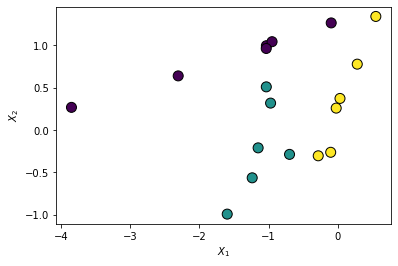

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_Under[:, 0], X_Under[:, 1], marker='o', c=y_Under,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()